In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression

# Define the game environment
board = np.array([
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
])

# Define the labels for the game states
labels = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0])

# Flatten the game states for training
X = board.reshape(9, -1)

# Train the machine learning model
model = LogisticRegression()
model.fit(X, labels)

# Function to get the computer's move
def get_computer_move(board):
    available_moves = np.where(board == 0)[0]
    move_scores = []

    for move in available_moves:
        new_board = np.copy(board)
        new_board[move] = 1
        move_scores.append(model.predict_proba(new_board.reshape(1, -1))[0][1])

    best_move = available_moves[np.argmax(move_scores)]
    return best_move

# Function to print the game board
def print_board(board):
    for row in board.reshape(3, -1):
        print(row)

# Main game loop
player_turn = True

while True:
    print_board(board)

    if player_turn:
        # Player's turn
        move = int(input("Enter your move (0-8): "))
        if board[move] != 0:
            print("Invalid move! Try again.")
            continue
        board[move] = -1
    else:
        # Computer's turn
        move = get_computer_move(board)
        board[move] = 1
        print("Computer's move:", move)

    # Check for game over condition
    if np.abs(np.sum(board)) == 3 or len(np.where(board == 0)[0]) == 0:
        print_board(board)
        print("Game over!")
        break

    player_turn = not player_turn


[0 0 0]
[0 0 0]
[0 0 0]


ValueError: invalid literal for int() with base 10: ''

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

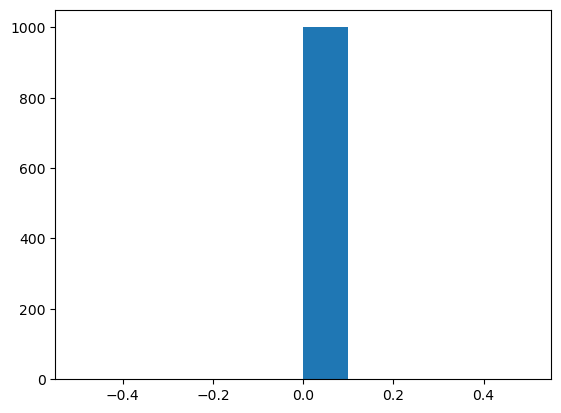

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
F

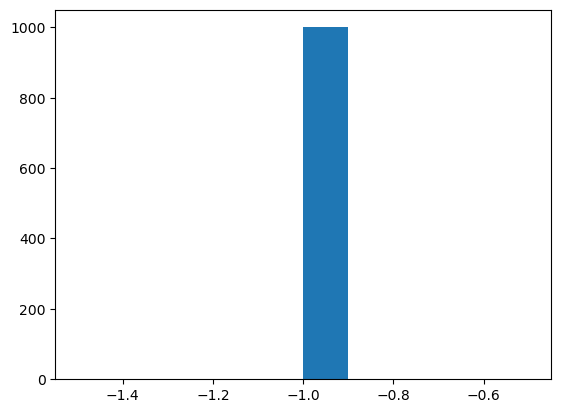

In [5]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt


def create_board():
    x = np.zeros((3, 3))
    return x

board = create_board()


def place(board, player, position):
    if board[position] == 0:
        board[position] = player
        return board


def possibilities(board):
    # it gives the indices wherever there are zeros in the form of 2 seperate
    # arrays in a tuple.
    # (array([0, 0, 1, 1, 1, 2, 2, 2]), array([1, 2, 0, 1, 2, 0, 1, 2]))
    y = np.where(board == 0)
    y = np.array(y)
    z = list(map(tuple, np.transpose(y)))
    # transpose it to get [0,1],[0,2],[1,0]
    # ... and so on. Then using map function convert each of them to tuple.
    # And keep it totally as a list.
    return z


def random_place(board, player):
    position = random.choice(possibilities(board))
    # print (position)
    return place(board, player, position)

board = random_place(board, 2)


def row_win(board, player):
    for i in range(3):
        if(player == board[i][0]):
            if((player == board[i][1]) and (player == board[i][2])):
                print("True")
            else:
                print("False")
        else:
            print("False")
           
row_win(board, 1)


def col_win(board, player):
    for i in range(3):
        if(player == board[0][i]):
            if((player == board[1][i]) and (player == board[2][i])):
                print("True")
            else:
                print("False")
        else:
            print("False")
           
col_win(board, 1)


def diag_win(board, player):
    z = 0
    for i in range(3):
        if(player == board[i][i]):
            z += 1
    if(z == len(board)):
        print("True")
    else:
        print("False")
     
diag_win(board, 1)


# Evaluate
def evaluate(board):
    winner = 0
    for player in [1, 2]:
        # Check if `row_win`, `col_win`, or `diag_win` apply.
        # if so, store `player` as `winner`.
        if (row_win(board, player) is True or col_win(board, player) is True):
            winner = player
        if(diag_win(board, player) is True):
            winner = player
    if np.all(board != 0) and winner == 0:
        winner = -1
    return winner

evaluate(board)


# play_game()
def play_game():
    
    board = create_board()
    if(0 in board):
        player = 1
        random_place(board, player)
        z = evaluate(board)
        player = 2
    return z


# plot
R = 1000
ty = []
r = []
s = time.time()
for i in range(R):
    z = play_game()
    r.append(z)

e = time.time()
c = e-s
print(c)

x = [r[j] for j in range(R)]
plt.hist(x)
plt.show()

# play strategic
def play_strategic_game():
    board, winner = create_board(), 0
    board[1, 1] = 1
    while winner == 0:
        for player in [2, 1]:
            # use `random_place` to play a game, and store as `board`.
            board = random_place(board, player)
            # use `evaluate(board)`, and store as `winner`.
            winner = evaluate(board)
            if winner != 0:
                break
    return winner

play_strategic_game()


# plotting play-strategic-game
# write your code here!
R = 1000
s = time.time()
z = []
for i in range(R):
    k = play_strategic_game()
    z.append(k)

e = time.time()

x = [z[j] for j in range(R)]
plt.hist(x)
plt.show()